In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
# Carga el dataset en un DataFrame de pandas
data = pd.read_csv("./Car details v3.csv")


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


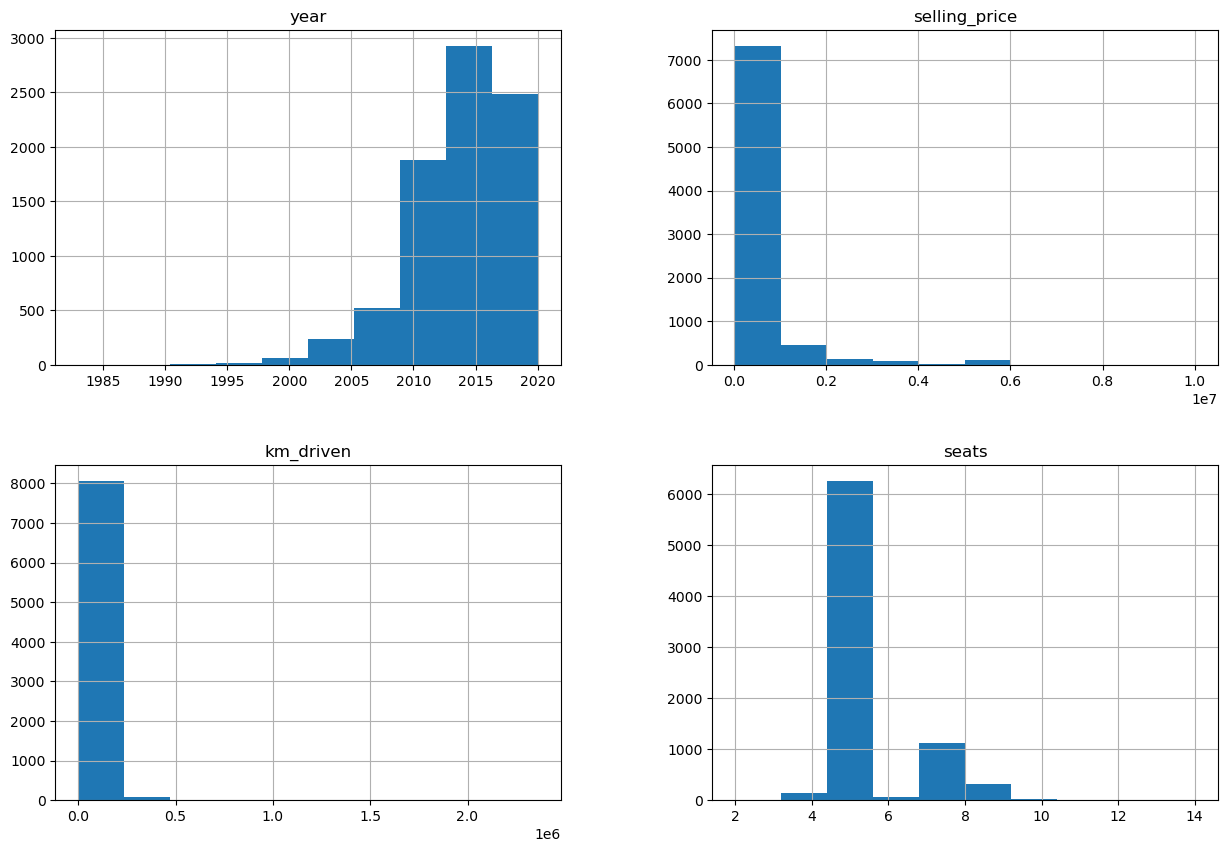

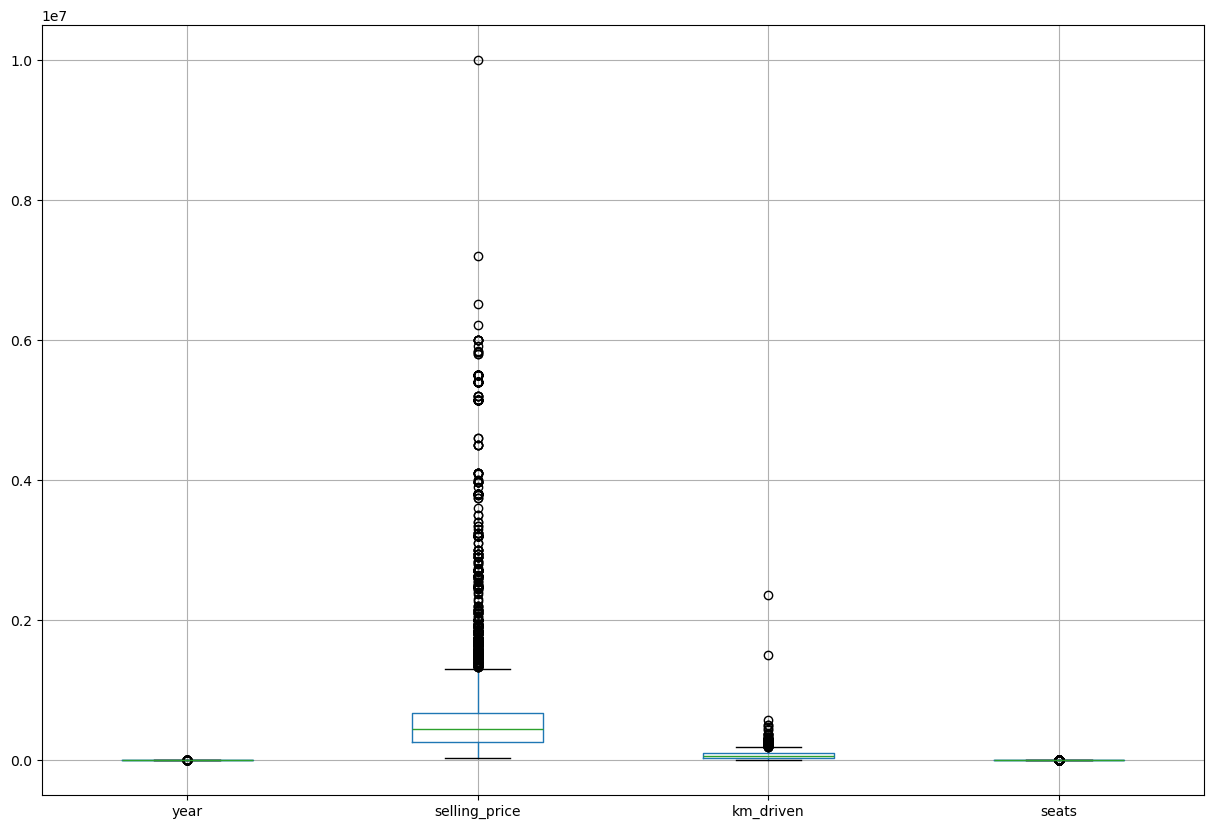

In [5]:
data.hist(figsize=(15, 10))
plt.show()

data.boxplot(figsize=(15, 10))
plt.show()


In [6]:
# Z-scores
zscores = np.abs(data[data.select_dtypes(include=[np.number]).columns] - data[data.select_dtypes(include=[np.number]).columns].mean()) / data[data.select_dtypes(include=[np.number]).columns].std()

# Marcar valores atípicos como True
outliers = zscores > 3

# Imprimir el número de valores atípicos por variable
print(outliers.sum(axis=0))


year              81
selling_price    229
km_driven         72
seats            102
dtype: int64


In [7]:
for col in data.select_dtypes(include=[object]).columns:
    print(data[col].value_counts())


name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third O

In [8]:
correlation_matrix = data[data.select_dtypes(include=[np.number]).columns].corr()
print(correlation_matrix)


                   year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000


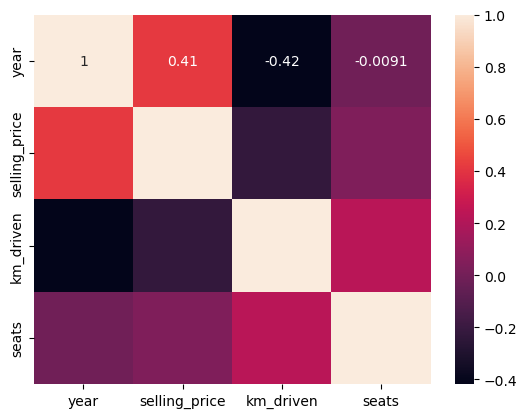

In [12]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True)
plt.show()


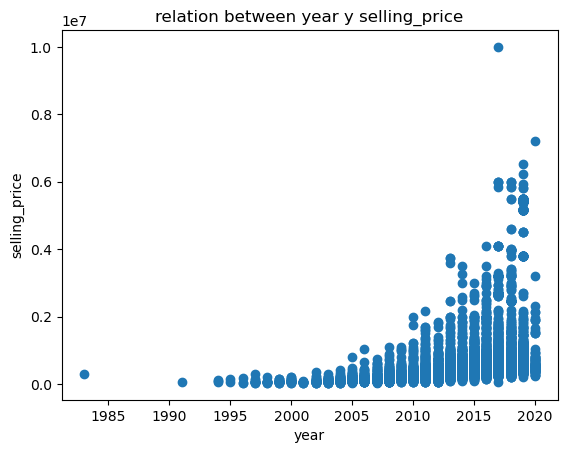

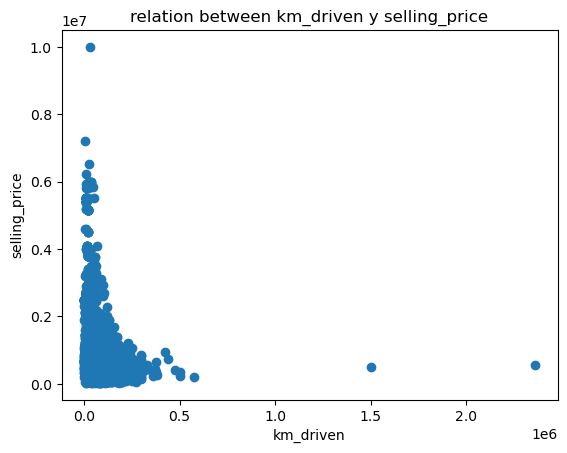

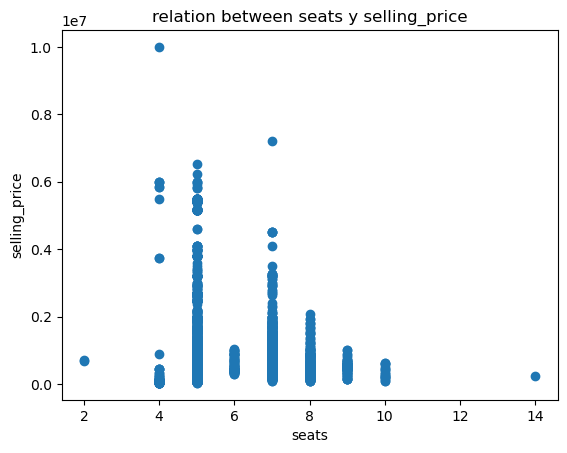

In [13]:
for col in data.select_dtypes(include=[np.number]).columns:
    if col != "selling_price":
        plt.scatter(data[col], data["selling_price"])
        plt.xlabel(col)
        plt.ylabel("selling_price")
        plt.title(f"relation between {col} y selling_price")
        plt.show()


In [14]:
missing_values = data.isna().sum()
print(missing_values)


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [15]:
data.dropna(inplace=True)


In [16]:
data[data["selling_price"].isna()]["selling_price"] = data["selling_price"].mean()


In [17]:
data[data["selling_price"].isna()]["selling_price"] = data["selling_price"].median()


In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
data[data.select_dtypes(include=[np.number]).columns] = imputer.fit_transform(data[data.select_dtypes(include=[np.number]).columns])
